In [116]:
import math
import matplotlib.pyplot as plt

In [117]:
# This block rotates a point around another point
# x2, y2 is the point that is being rotated
# x1, y1 is the pivot of the rotation
# theta is the angle rotated
# rotate(pivot, movingPoint, angle)
def rotate(x1, y1, x2, y2, theta):
    return [(x2-x1)*math.cos(theta)-(y2-y1)*math.sin(theta)+x1, 
            (x2-x1)*math.sin(theta)+(y2-y1)*math.cos(theta)+y1]

In [118]:
def unrotate(points_u, anglesArray):
    for n in range(len(anglesArray)):
        for i in range(len(points_u)):
            points_u[i] = rotate(0,
                                 0,
                                 points_u[i][0],
                                 points_u[i][1],
                                 -anglesArray[len(anglesArray)-1-n])
    return points_u

# plots the points on the point matrix
def plot_points(pointsArray, anglesArray):
    #pointsArray = unrotate(pointsArray.copy(), anglesArray.copy())
    #print(pointsArray)
    #print()
    x = []
    y = []
    for p in pointsArray:
        x.append(p[0])
        y.append(p[1])
    plt.axis('equal')
    plt.plot(x,y)

# rotate the points around the origin
def rotate_points(pointsArray, angle):
    # rotate all points from the previous stages
    for n in range(len(pointsArray)):
        pointsArray[n] = rotate(0,
                                0,
                                pointsArray[n][0],
                                pointsArray[n][1],
                                angle)
    return pointsArray

[1, -1]
diffY: 1.0 1.0
angle: 1.2074182697257333e-06
multiplier: 1
delX: 0.21213203435596423

[1.2121320343559643, -0.7878679656440357]
diffY: 1.0 1.5384964070281975
angle: 11.976725812374122
multiplier: 1
delX: 0.21213203435596423

[1.4242640687119286, -0.5757359312880714]
diffY: 1.5384964070281975 2.4738148017364114
angle: 11.013041961234762
multiplier: 1
delX: 0.16349390023581573

[1.5877579689477443, -0.3242011532042424]
diffY: 2.4738148017364114 4.897447011693625
angle: 10.469759967145135
multiplier: 1
delX: 0.11243165086038667

[1.700189619808131, -0.04606607112215749]
diffY: 4.897447011693625 36.907632415614245
angle: 9.988441926796831
multiplier: 1
delX: 0.06001802343904123

[1.7602076432471723, 0.24786901841713294]
diffY: 36.907632415614245 -7.101362060041567
angle: 170.43239430668623
multiplier: -1
delX: -0.008125418045545734

[1.7520822252016266, -0.05202092403106773]
diffY: -7.101362060041567 33.68033647682335
angle: 170.28376015559252
multiplier: 1
delX: 0.0418326874807819

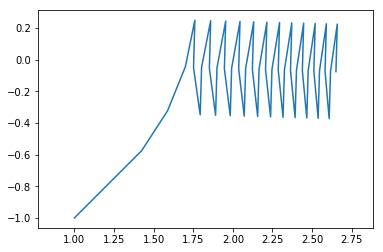

In [124]:
'''
    What we tried to do previously did not work.
    But, I think that there is a more elegant solution that will use less memory.
    It will involve a lot of overwriting, but the values of the angles will not need to be saved.
    
    Now, I am going to try something different.  Instead of turning the graph, I will travel along
    the tangent line.  So, to try this out, I will comment out the rotating part.
    If the resulting vector is less than 90 degrees from the previous vector, then I will negate delta X.
'''
points = [] # is the array of points that will be plotted at the end
#angles = []
init = [1,-1] # is the initial point.  This is always given.
points.append(init)
iterations = 50 # is the iterations to run the algorithm.  This has limits of [1,infinity)
stepSize = 0.3 # is the stepsize.  A smaller stepsize will make the final result look smoother.
prevPoint = init.copy() # this is used in the iterative part.
multiplier = 1

# Now, we need to find the value of diffY at our starting point.  It can be any real number.
diffY = -init[0]/init[1]

for i in range(iterations):
    ### Find the next point ###
    # We want to find the next point, but we need to take into account that the starting point
    #    can be vertical.  So, we need to rotate right out of the gate.
    # Now, the question is how to rotate.
    
    delY = diffY * stepSize * 1/(math.sqrt(1+(diffY**2)))
    delX = stepSize * 1/(math.sqrt(1+(diffY**2)))
    
    prevDiffY = diffY
    diffY = -prevPoint[0]/prevPoint[1]
    print(prevPoint)
    print('diffY: ' + str(prevDiffY) + ' ' + str(diffY))
    u = [1, prevDiffY]
    v = [1, diffY]
    angle = math.acos((u[0]*v[0]+u[1]*v[1])/
                      (math.sqrt(u[0]**2 + u[1]**2)*
                       math.sqrt(v[0]**2 + v[1]**2)))
    print('angle: ' + str(angle * (180/math.pi)))
    if angle > math.pi/2:
        multiplier *= -1
    if multiplier == -1:
        delY *= -1
    
    print('multiplier: ' + str(multiplier))
    delX *= multiplier
    nextPoint = [prevPoint[0] + delX, prevPoint[1] + delY]
    points.append(nextPoint)
    print('delX: ' + str(delX))
    print()
    prevPoint = nextPoint.copy()
    
    '''
    # Find the two vectors to determine what angle to turn the whole graph
    u = [1, diffY]
    v = [prevPoint[0], prevPoint[1]]
    angle = 0
    # alpha is the angle between the vector of the slopeline and the vector from the point to the origin
    alpha = math.acos((u[0]*v[0]+u[1]*v[1])/
                      (math.sqrt(u[0]**2 + u[1]**2)*
                       math.sqrt(v[0]**2 + v[1]**2)))
    u = [1, 0]
    # beta is the angle between the vector of the horizontal and the slopeline
    beta = math.acos((u[0]*v[0]+u[1]*v[1])/
                      (math.sqrt(u[0]**2 + u[1]**2)*
                       math.sqrt(v[0]**2 + v[1]**2)))
    #print(prevPoint)
    # alpha domain is 0 to pi
    # beta domain is 0 to pi
    print('alpha: ' + str(alpha * (180/math.pi)))
    print('beta: ' + str(beta * (180/math.pi)))
    if prevPoint[1] >= 0:
        angle = alpha - beta
    else:
        angle = beta - alpha
    angles.append(angle)
    print('angle: ' + str(angle * (180/math.pi)))
    
    # Determine the angle to turn the differential equation
    angleTotal = 0
    for a in angles:
        angleTotal += a
    print('angleTotal: ' + str(angleTotal))
    
    # Turn the differential equation
    #xComp = prevPoint[0]*math.cos(-angle)-prevPoint[1]*math.sin(-angle)
    #yComp = prevPoint[1]*math.cos(-angle)+prevPoint[0]*math.sin(-angle)
    #print(xComp)
    #diffY = math.tan(math.atan(xComp)
    #                 +angleTotal)
    #print('diffY: ' + str(diffY))
    
    # rotate the points
    points = rotate_points(points.copy(), angle)
    print()
    
    # Now, we find the next point using linear approximation
    nextY = prevPoint[1]
    nextX = prevPoint[0] + stepSize
    nextPoint = [nextX, nextY]
    #print(nextPoint)
    points.append(nextPoint)
    points = rotate_points(points.copy(), -angle)
    prevPoint = points[len(points)-1]
    diffY = prevPoint[0]
    '''
    
#print(points)
plot_points(points.copy(), angles.copy())